In [1]:
# 1) Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [2]:
# 2) Load datasets
print("Loading datasets...")
day = pd.read_csv("data/day.csv")
hour = pd.read_csv("data/hour.csv")

print("day.csv shape:", day.shape)
print("hour.csv shape:", hour.shape)

Loading datasets...
day.csv shape: (731, 16)
hour.csv shape: (17379, 17)


In [3]:
# 3) Quick EDA
print('\n--- Dataset Info ---')
print(day.info())
print(hour.info())

print('\n--- Missing Values ---')
print('DAY:', day.isnull().sum().sum())
print('HOUR:', hour.isnull().sum().sum())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0

In [4]:
# 4) Data preprocessing function
def preprocess_data(df, dataset_name):
    """Preprocess data for modeling"""
    print(f"\nPreprocessing {dataset_name} dataset...")

    # Drop unnecessary columns
    cols_to_drop = ['casual', 'registered', 'cnt', 'dteday', 'instant']
    X = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
    y = df['cnt']

    print(f"Features: {X.columns.tolist()}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    return X, y

In [5]:
# 5) Train Random Forest model
def train_random_forest(X, y, dataset_name):
    """Train Random Forest model"""
    print(f"\nTraining {dataset_name} Random Forest...")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Random Forest
    rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = rf.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"✅ {dataset_name} Performance:")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    return rf, scaler, X_test_scaled, y_test, y_pred

In [6]:
# 6) Feature importance
def plot_feature_importance(model, feature_names, dataset_name):
    """Plot feature importance"""
    importances = model.feature_importances_
    feature_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print(f"\n📊 {dataset_name} - Top 5 Features:")
    print(feature_imp_df.head())

    plt.figure(figsize=(10, 6))
    feature_imp_df.head(10).plot.barh(x='feature', y='importance')
    plt.title(f'{dataset_name} - Feature Importance')
    plt.tight_layout()
    plt.show()

    return feature_imp_df

In [7]:
# 7) Plot results
def plot_predictions(y_test, y_pred, dataset_name):
    """Plot actual vs predicted values"""
    plt.figure(figsize=(12, 4))

    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5, s=20)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{dataset_name} - Actual vs Predicted')

    # Residuals
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5, s=20)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'{dataset_name} - Residual Plot')

    plt.tight_layout()
    plt.show()


🚀 STARTING RANDOM FOREST TRAINING...

📅 DAY DATASET TRAINING

Preprocessing DAY dataset...
Features: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X shape: (731, 11), y shape: (731,)

Training DAY Random Forest...
✅ DAY Performance:
R2 Score: 0.8794
RMSE: 695.45
MAE: 434.58

📊 DAY - Top 5 Features:
  feature  importance
7    temp    0.360209
1      yr    0.286373
8   atemp    0.152258
9     hum    0.057798
0  season    0.052661


<Figure size 1000x600 with 0 Axes>

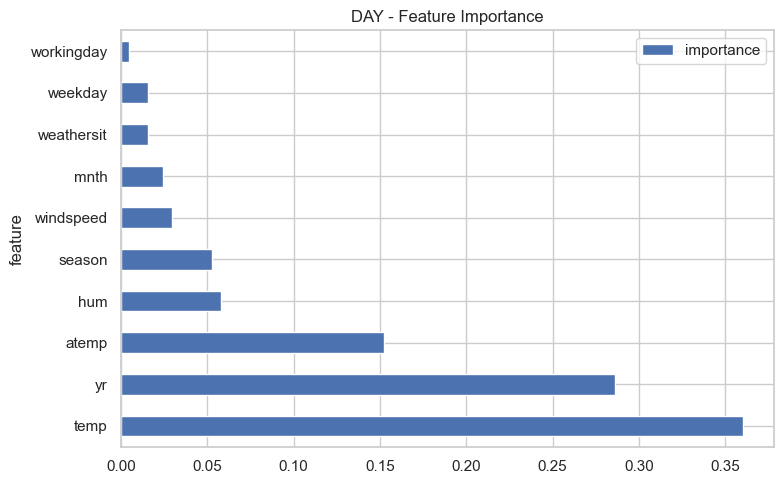

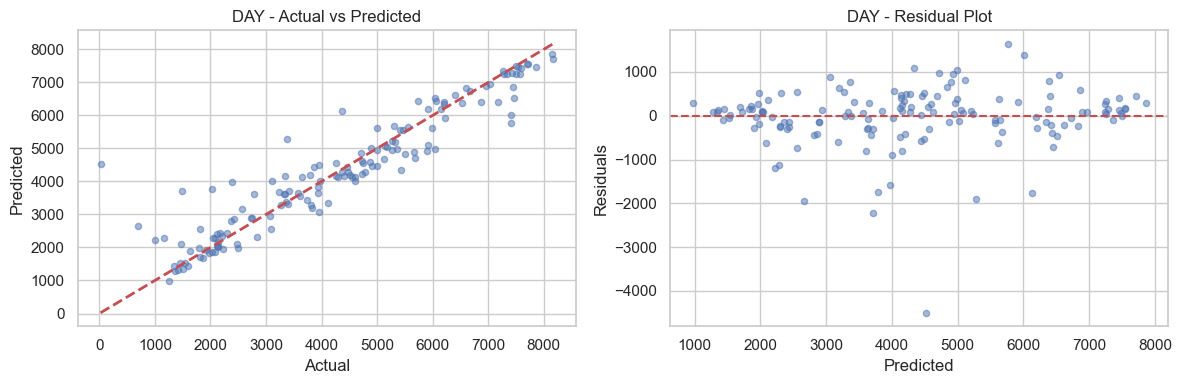


⏰ HOUR DATASET TRAINING

Preprocessing HOUR dataset...
Features: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X shape: (17379, 12), y shape: (17379,)

Training HOUR Random Forest...
✅ HOUR Performance:
R2 Score: 0.9428
RMSE: 42.57
MAE: 25.41

📊 HOUR - Top 5 Features:
       feature  importance
3           hr    0.622653
8         temp    0.119058
1           yr    0.082368
6   workingday    0.058688
10         hum    0.023430


<Figure size 1000x600 with 0 Axes>

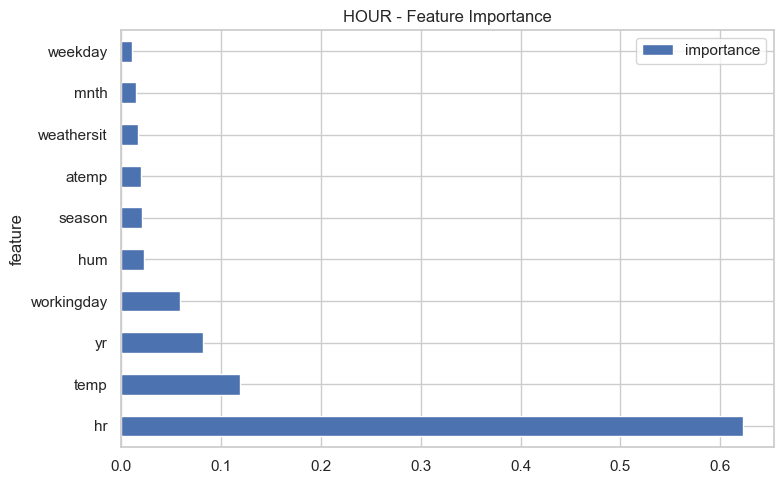

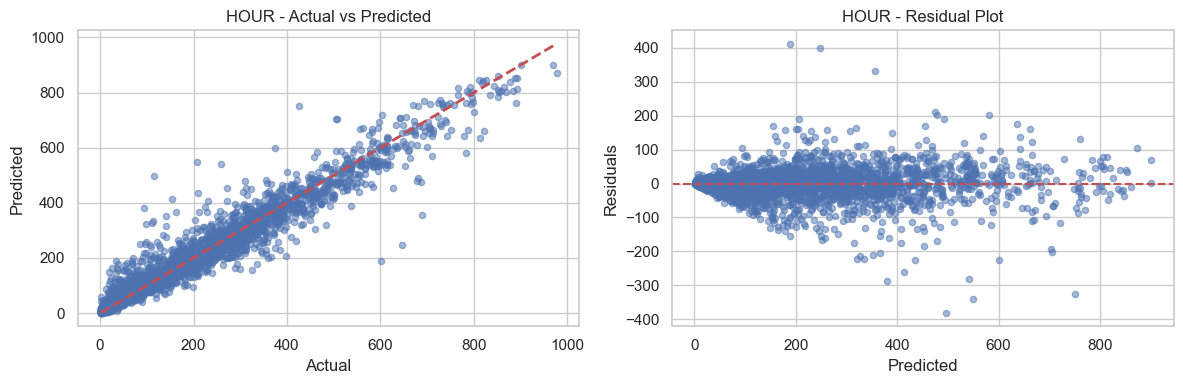

In [8]:
# 8) Main training execution
print("🚀 STARTING RANDOM FOREST TRAINING...")

# Train DAY model
print("\n" + "="*50)
print("📅 DAY DATASET TRAINING")
print("="*50)
X_day, y_day = preprocess_data(day, "DAY")
day_model, day_scaler, X_day_test, y_day_test, y_day_pred = train_random_forest(X_day, y_day, "DAY")
day_importance = plot_feature_importance(day_model, X_day.columns.tolist(), "DAY")
plot_predictions(y_day_test, y_day_pred, "DAY")

# Train HOUR model
print("\n" + "="*50)
print("⏰ HOUR DATASET TRAINING")
print("="*50)
X_hour, y_hour = preprocess_data(hour, "HOUR")
hour_model, hour_scaler, X_hour_test, y_hour_test, y_hour_pred = train_random_forest(X_hour, y_hour, "HOUR")
hour_importance = plot_feature_importance(hour_model, X_hour.columns.tolist(), "HOUR")
plot_predictions(y_hour_test, y_hour_pred, "HOUR")

In [9]:
# 9) Save models
print("\n" + "="*50)
print("💾 SAVING MODELS...")
print("="*50)

# Save DAY model
joblib.dump(day_model, 'rf_day_model.pkl')
joblib.dump(day_scaler, 'day_scaler.pkl')
print("✅ DAY model saved: rf_day_model.pkl")
print("✅ DAY scaler saved: day_scaler.pkl")

# Save HOUR model
joblib.dump(hour_model, 'rf_hour_model.pkl')
joblib.dump(hour_scaler, 'hour_scaler.pkl')
print("✅ HOUR model saved: rf_hour_model.pkl")
print("✅ HOUR scaler saved: hour_scaler.pkl")


💾 SAVING MODELS...
✅ DAY model saved: rf_day_model.pkl
✅ DAY scaler saved: day_scaler.pkl
✅ HOUR model saved: rf_hour_model.pkl
✅ HOUR scaler saved: hour_scaler.pkl



📈 PERFORMANCE COMPARISON
  Dataset  R2_Score        RMSE         MAE  Samples
0     DAY  0.879386  695.448335  434.582841      731
1    HOUR  0.942780   42.566348   25.407098    17379


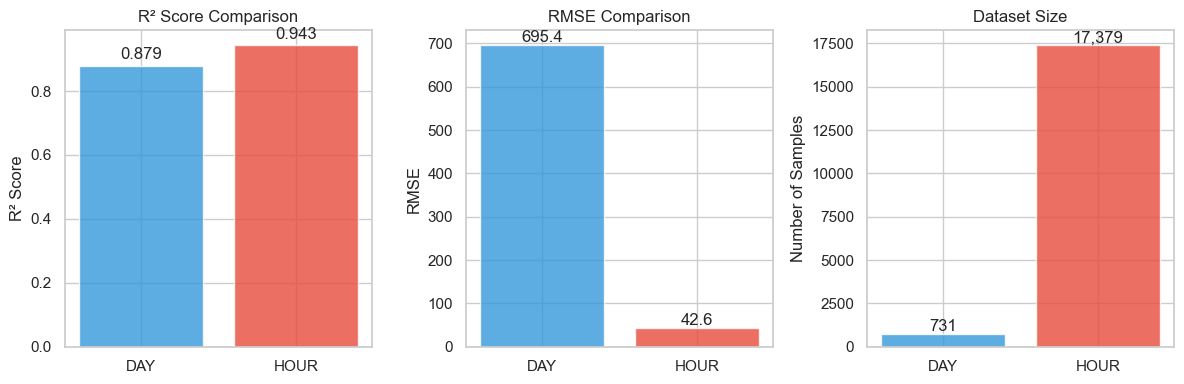

In [10]:
# 10) Performance comparison
print("\n" + "="*50)
print("📈 PERFORMANCE COMPARISON")
print("="*50)

day_r2 = r2_score(y_day_test, y_day_pred)
hour_r2 = r2_score(y_hour_test, y_hour_pred)

comparison_df = pd.DataFrame({
    'Dataset': ['DAY', 'HOUR'],
    'R2_Score': [day_r2, hour_r2],
    'RMSE': [
        np.sqrt(mean_squared_error(y_day_test, y_day_pred)),
        np.sqrt(mean_squared_error(y_hour_test, y_hour_pred))
    ],
    'MAE': [
        mean_absolute_error(y_day_test, y_day_pred),
        mean_absolute_error(y_hour_test, y_hour_pred)
    ],
    'Samples': [len(X_day), len(X_hour)]
})

print(comparison_df)

# Plot comparison
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
bars = plt.bar(comparison_df['Dataset'], comparison_df['R2_Score'],
               color=['#3498db', '#e74c3c'], alpha=0.8)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
for bar, value in zip(bars, comparison_df['R2_Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.subplot(1, 3, 2)
bars = plt.bar(comparison_df['Dataset'], comparison_df['RMSE'],
               color=['#3498db', '#e74c3c'], alpha=0.8)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
for bar, value in zip(bars, comparison_df['RMSE']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.1f}', ha='center', va='bottom')

plt.subplot(1, 3, 3)
bars = plt.bar(comparison_df['Dataset'], comparison_df['Samples'],
               color=['#3498db', '#e74c3c'], alpha=0.8)
plt.title('Dataset Size')
plt.ylabel('Number of Samples')
for bar, value in zip(bars, comparison_df['Samples']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [11]:
# 11) Test loaded models
print("\n" + "="*50)
print("🧪 TESTING SAVED MODELS...")
print("="*50)

def test_loaded_models():
    """Test that saved models can be loaded and used"""
    try:
        # Load models
        day_model_loaded = joblib.load('rf_day_model.pkl')
        hour_model_loaded = joblib.load('rf_hour_model.pkl')
        day_scaler_loaded = joblib.load('day_scaler.pkl')
        hour_scaler_loaded = joblib.load('hour_scaler.pkl')

        print("✅ All models loaded successfully!")

        # Test predictions
        day_sample = X_day.iloc[[0]]
        hour_sample = X_hour.iloc[[0]]

        day_pred = day_model_loaded.predict(day_scaler_loaded.transform(day_sample))
        hour_pred = hour_model_loaded.predict(hour_scaler_loaded.transform(hour_sample))

        print(f"📅 DAY sample - Actual: {y_day.iloc[0]}, Predicted: {day_pred[0]:.1f}")
        print(f"⏰ HOUR sample - Actual: {y_hour.iloc[0]}, Predicted: {hour_pred[0]:.1f}")

        return True

    except Exception as e:
        print(f"❌ Error: {e}")
        return False

test_loaded_models()


🧪 TESTING SAVED MODELS...
✅ All models loaded successfully!
📅 DAY sample - Actual: 985, Predicted: 1361.4
⏰ HOUR sample - Actual: 16, Predicted: 26.7


True

In [12]:
# 12) Membuat File Model
print("\n" + "="*50)
print("🎉 TRAINING COMPLETE!")
print("="*50)
print("📁 Files created:")
print("   - rf_day_model.pkl (DAY Random Forest model)")
print("   - rf_hour_model.pkl (HOUR Random Forest model)")
print("   - day_scaler.pkl (DAY feature scaler)")
print("   - hour_scaler.pkl (HOUR feature scaler)")
print("\n✅ Ready for predictions!")


🎉 TRAINING COMPLETE!
📁 Files created:
   - rf_day_model.pkl (DAY Random Forest model)
   - rf_hour_model.pkl (HOUR Random Forest model)
   - day_scaler.pkl (DAY feature scaler)
   - hour_scaler.pkl (HOUR feature scaler)

✅ Ready for predictions!
